# Lab Session #6.1
## Computational Neurophysiology [E010620A]
### Dept of Electronics and Informatics (VUB) and Dept of Information Technology (UGent)
Fotios Drakopoulos, Jorne Laton, Lloyd Plumart, Talis Vertriest, Jeroen Van Schependom, Sarah Verhulst

<font color=blue>Student names and IDs:</font> Robbe De Beck [01902805], Robbe De Muynck [01908861]
<br>
<font color=blue>Academic Year:</font> 2022-2023

# Unsupervised and supervised learning

This exercise is adapted from the examples provided in the textbook "Neuronal Dynamics" by Gerstner, Kistler, Naud, Paninski (2014, Cambridge University Press) and the 2020 Neuron publication "Artificial Neural Networks for Neuroscientists: A Primer" publication by GR Yang and X-J Wang. Code adapted into exercise by Fotios Drakopoulos and Sarah Verhulst, UGent, 2021.

## Supervised learning: Oja's rule in Hebbian Learning <a id="introduction"></a>

The figure below shows the configuration of a neuron learning from the joint input of two presynaptic neurons. 

<img src='Oja_setup.png' width="400" height="400">

In this first part of the exercise, you will evaluate how the behavior of the pre-synaptic inputs and learning rate affect the weight optimisation under Oja's learning rule. The below code executes and plots the synaptic weights and post-synaptic firing rates given a cloud of presynaptic firing rates. You can modify the learning rate *eta* as well as the relationship between the pre-synaptic data by changing the *ratio* parameter. 

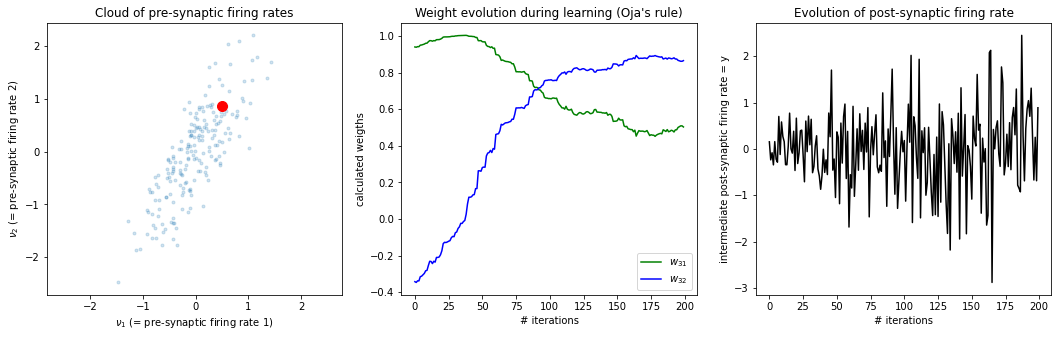

The final weight vector w is: (0.503,0.865)


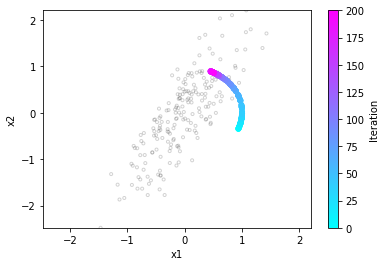

In [89]:
%matplotlib inline  
import oja as oja
import matplotlib.pyplot as plt
import numpy as np

def Oja_behaviour_plots(cloud, wcourse, out):

    # Plot 1: Cloud of pre-synaptic firing rates
    # x-axis: firing rate of pre-synaptic neuron 1
    # y-axis: firing rate of pre-synaptic neuron 2
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    axs[0].scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
    axs[0].plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
    axs[0].axis('equal')
    axs[0].set_xlabel(r"$\nu_1$ (= pre-synaptic firing rate 1)")
    axs[0].set_ylabel(r"$\nu_2$ (= pre-synaptic firing rate 2)")
    axs[0].set_title("Cloud of pre-synaptic firing rates")
    # plt.show()

    # Plot 2: Synaptic weight evolution during learning
    # fig, ax = plt.subplots(1, 1)
    axs[1].plot(wcourse[:, 0], "g", label="$w_{31}$")
    axs[1].plot(wcourse[:, 1], "b", label="$w_{32}$")
    axs[1].set_xlabel("# iterations")
    axs[1].set_ylabel("calculated weigths")
    axs[1].set_title("Weight evolution during learning (Oja's rule)")
    axs[1].legend()
    # plt.show()

    # Plot 3: Evolution of post-synaptic firing rate
    # fig, ax = plt.subplots(1, 1)
    axs[2].plot(out[:, 0], "k")
    axs[2].set_xlabel("# iterations")
    axs[2].set_ylabel("intermediate post-synaptic firing rate = y")
    axs[2].set_title("Evolution of post-synaptic firing rate")
    plt.show()

    # Print the final weight vector
    print("The final weight vector w is: ({:.3f},{:.3f})".format(wcourse[-1,0],wcourse[-1,1]))

# Generate the cloud of pre-synaptic firing rates
np.random.seed(211)
cloud = oja.make_cloud(n=200, ratio=.3, angle=60)

# Apply Oja's learning rule: obtain synaptic weight evolution
# eta: controls learning rate for weight updates
wcourse, out = oja.learn(cloud, initial_angle=-20, eta=0.04)

# Construct plots regarding Oja's learning rule
Oja_behaviour_plots(cloud, wcourse, out)

# plot_oja_trace from oja.py
oja.plot_oja_trace(cloud, wcourse)

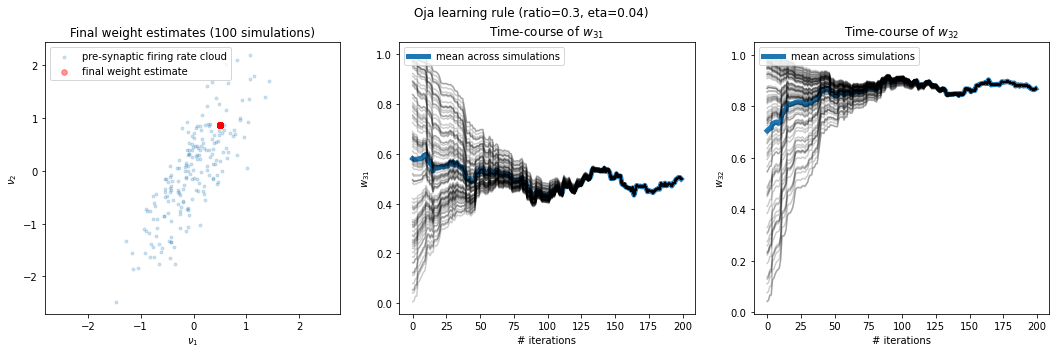

In [111]:
def simul_100(ratio=0.3, eta=0.04, init_angle=None, n_iter=100, seed=211):
    # Generate pre-synaptic firing rates cloud 
    np.random.seed(seed)
    cloud = oja.make_cloud(n=200, ratio=ratio, angle=60)
    wcourses = np.zeros((n_iter, 200, 2))

    # Apply Oja's learning rule --> repeat simulations 100 times
    for i in range(n_iter):
        # initial_angle set to None, to visualize Oja learning strategy (random starting point)
        if init_angle is None:
            angle = np.random.rand() * 90 # limit to positive weights
        else: 
            angle = init_angle
        wcourse, out = oja.learn(cloud, initial_angle=angle, eta=eta)
        wcourses[i] = wcourse

    # Construct plots: Oja's learning rule (synaptic weight evolution)
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    axs[0].scatter(cloud[:, 0], cloud[:, 1],
                marker=".", alpha=.2, label="pre-synaptic firing rate cloud")
    axs[0].scatter(wcourses[:, -1, 0], wcourses[:, -1, 1],
                c="r", marker=".", alpha=0.4, s=125, label="final weight estimate")
    axs[1].plot(wcourses[:, :, 0].mean(axis=0), lw=5, label='mean across simulations')
    axs[2].plot(wcourses[:, :, 1].mean(axis=0), lw=5, label='mean across simulations')
    for wcourse in wcourses:
        axs[1].plot(wcourse[:, 0], "k", alpha=0.2)
        axs[2].plot(wcourse[:, 1], "k", alpha=0.2)

    fig.suptitle(f'Oja learning rule (ratio={ratio}, eta={eta})')
    axs[0].set_title(f"Final weight estimates ({n_iter} simulations)")
    axs[0].axis('equal')
    axs[0].set_xlabel(r"$\nu_1$")
    axs[0].set_ylabel(r"$\nu_2$")
    axs[0].legend(loc='upper left')
    axs[1].set_title("Time-course of $w_{31}$")
    axs[1].set_xlabel("# iterations")
    axs[1].set_ylabel("$w_{31}$")
    axs[1].legend(loc='upper left')
    axs[2].set_title("Time-course of $w_{32}$")
    axs[2].set_xlabel("# iterations")
    axs[2].set_ylabel("$w_{32}$")
    axs[2].legend(loc='upper left')
    plt.show()

simul_100(ratio=0.3, eta=0.04)

### Q1: Oja learning <a id="Q1"></a>

Run the above code and get a feeling for what the function and figures do. You can think of each of the two columns of the cloud as the time series of firing rates of the presynaptic neurons $\nu_1$ and $\nu_2$.

- Change the learning rate eta from the original value to a much larger value 0.2, qualitatively describe the effect of this change on the weight optimisation

The original data-cloud of pre-synaptic firing rates showed correlations between the firing rates. For the next simulation, you will simulate how study Oja’s rule works on a data set which has no correlations. 

- You can modify the *ratio* parameter in the make_cloud funtion and set it to 1 to simulate circular data-sets (i.e. no correlations between the pre-synaptic firing rates). Evaluate the time course of the weight vectors when ratio is set to 1, and repeat the simulations many times (e.g. 100) to evaluate what Oja's rule is doing for this type of data. Each time you call the *learn* function, it will choose a new set of random initial conditions. Can you explain what happens to the final weight estimate and the time-course of the weights?

- Now do this for different learning rates eta, and qualitatively describe the effects

- Lastly, return to a cloud ratio of 0.3, and repeat the simulations e.g. 100 times. What is the difference in learning do you observe between the 0.3 and 1 ratio conditions for a learning rate eta of 0.04?

* [Fill in answer here](#A1)

### Q2: Oja final weights <a id="Q2"></a>

If we assume a linear firing rate model, we can write $\nu^{post}=\sum_{j}w_{j}\nu_{j}^{pre}=w \cdot \nu^{pre}$, where the dot denotes a scalar product, and hence the output rate $\nu^{post}$ (or $y$) can be interpreted as a projection of the input vector onto the weight vector. 

- After learning (e.g. ratio 0.3 and eta 0.04), what does the output y tell about the input? Can you see a resemblance between Oja's learning rule and a principle component analysis?

- Take the final weights [w31, w32], then calculate a single input vector (v1=?, v2=?) that leads to a maximal output firing y. You can perform this procedure by first constraining your input to norm([v1,v2]) =1 to write v2 as a function of v1. Then simulate $y$ for v1 in range between -1 and +1 to graphically determine the maximal firing rate (no need to compute the derivative). 

- Perform the same procedure, but now calculate the input vector which leads to a minimal output firing y.

The above exercises assume that the input activities can be negative (indeed the inputs were always statistically centered). In actual neurons, if we think of their activity as their firing rate, this cannot be less than zero.

- Repeat the simulations from this block, but by applying the learning rule on a noncentered data cloud. E.g., use cloud = (3,5) + oja.make_cloud(n=1000, ratio=.4, angle=-45), which centers the data around (3,5). What conclusions can you draw? Can you think of a modification to the learning rule?

* [Fill in answer here](#A2)

## Answers
#### A1: Oja Learning  <a id="A1"></a>
* [Go back to Q1](#Q1) 

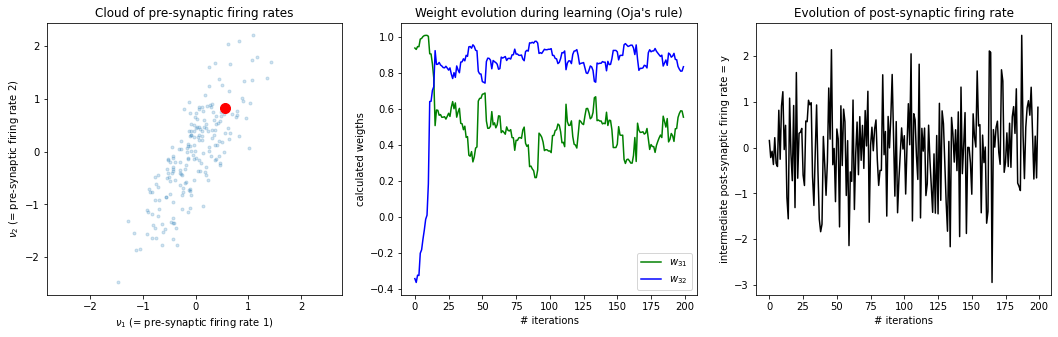

The final weight vector w is: (0.555,0.836)


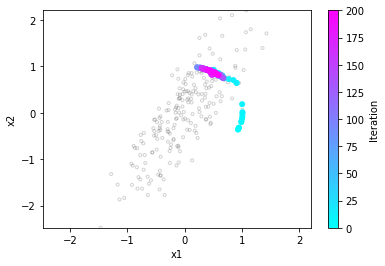

In [112]:
##### Larger learning rate: eta = 0.2 (vs 0.04) #####

# Generate pre-synaptic firing rates cloud & apply Oja's learning rule
np.random.seed(211)
cloud = oja.make_cloud(n=200, ratio=.3, angle=60)
wcourse, out = oja.learn(cloud, initial_angle=-20, eta=0.2)

# Construct plots: Oja's learning rule (synaptic weight evolution)
Oja_behaviour_plots(cloud, wcourse, out)

# plot_oja_trace from oja.py
oja.plot_oja_trace(cloud, wcourse)

<div class="alert alert-success">
<span style="color:black">

**Q1.1 Answer** 
    
<!-- \begin{tcolorbox}[colback=green!5] -->
<!-- Qualitatively describe the effect of this change on the weight optimisation -->

The Oja learning rule results in synaptic weights that are asymptotically normalized to 1 (i.e. the sum of the
squared weights equals 1).
Increasing the learning rate eta to 0.2 leads to faster weight optimisation: the weights converge more quickly towards their final values (around 20 iterations instead of 125), resulting in a steeper slope at the start of the weight evolution plot. This indicates that larger learning rates allow for faster adaptation of the synaptic weights. However, due to the larger learning rate, the weight evolution is a lot less smooth for the higher learning rate scenario, indicating more oscillations around the asymptotical convergence instead of gradually reaching the stable convergence.

In conclusion: larger learning rates can lead to faster convergence of the synaptic weights, but with the drawback of a less stable solution.

<!-- \end{tcolorbox} -->
     
</span>

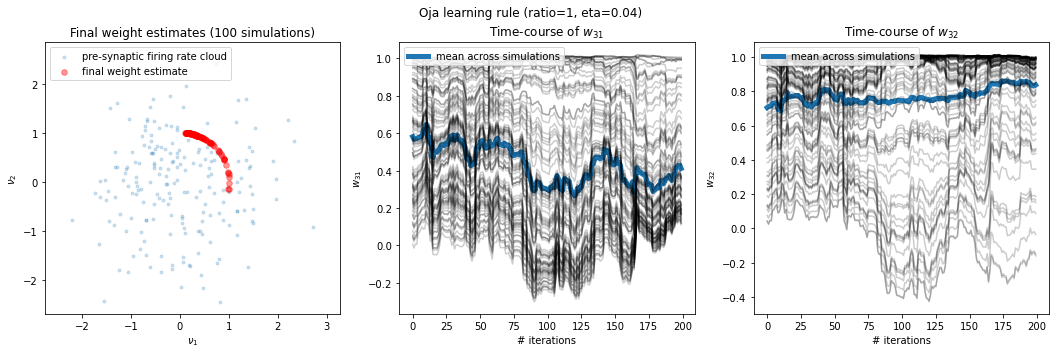

In [113]:
##### No pre-synaptic firing rates correlation: ratio = 1 #####

simul_100(ratio=1, eta=0.04, n_iter=100)

# Evaluate the time course of the weight vectors when ratio is set to 1, and repeat the simulations
# many times (e.g. 100) to evaluate what Oja's rule is doing for this type of data.
# Each time you call the *learn* function, it will choose a new set of random initial conditions.
# Can you explain what happens to the final weight estimate and the time-course of the weights?

<div class="alert alert-success">
<span style="color:black">

**Q1.2 Answer** 
    
<!-- \begin{tcolorbox}[colback=green!5] -->

<!-- You can modify the *ratio* parameter in the make_cloud funtion and set it to 1 to simulate circular data-sets (i.e. no correlations between the pre-synaptic firing rates). Evaluate the time course of the weight vectors when ratio is set to 1, and repeat the simulations many times (e.g. 100) to evaluate what Oja's rule is doing for this type of data. Each time you call the *learn* function, it will choose a new set of random initial conditions. Can you explain what happens to the final weight estimate and the time-course of the weights? -->

Initial angles for the Oja learning simulation are determined to be in the interval [0°, 90°] to limit the synaptic weights as much as possible to positive values.
When simulating for circular data sets with no correlations (ratio=1), one can appreciate that the weights do not exhibit convergence towards a clear preferred final weight.
This indicates that Oja's rule struggles to find meaningful weights when there are no correlations in the data.

The time-course of the weights for each simulation shows fluctuating behavior around the initial (random) starting point of the weight optimization.
However, an important observation is that the weights are located on the unit circle (here limited by us to the positive weights range): the asymptotic normalization of the weight vector is dictated by Oja's rule.

An interesting observation to make is the fact that the mean of the final weight vector ($w_{31}$, $w_{32}$) across simulations approaches (cos(45), sin(45)) ≈ (0.5, 0.85). This indicates that the mean final weight could be the result of a random sampling of the unit circle, limited to its first quadrant. One can interprete this behaviour as the synaptic weights having no meaningful optimized scenario to converge to.

<!-- Despite the fluctuation and lack of convergence, the weights maintain a specific geometric relationship. This highlights the inherent constraints of Oja's rule in finding meaningful weights in the absence of correlations, while still preserving certain properties dictated by the rule. -->

<!-- \end{tcolorbox} -->
     
</span>

In [ ]:
##### Different learning rates eta (ratio = 1) #####

# Generate pre-synaptic firing rates cloud & apply Oja's learning rule
cloud = oja.make_cloud(n=200, ratio=1, angle=60)
wcourse, out = oja.learn(cloud, initial_angle=-20, eta=0.04)

# Construct plots: Oja's learning rule (synaptic weight evolution)
Oja_behaviour_plots(cloud, wcourse, out)

# Now do this for different learning rates eta,
# and qualitatively describe the effects

<div class="alert alert-success">
<span style="color:black">

**Q1.3 Answer** 
    
\begin{tcolorbox}[colback=green!5]

    Now do this for different learning rates eta, and qualitatively describe the effects
    
When varying the learning rate, eta, different effects can be observed. Higher learning rates result in faster convergence of the weights, but they can also lead to instability and overshooting of the optimal weights. Lower learning rates result in slower convergence but may provide more stable weight estimates.

\end{tcolorbox}
     
</span>

In [ ]:
##### Difference in learning between ratio = 0.3 and 1 #####
#####             (eta = 0.04, ratio 0.3)              #####
# -----> repeat simulations 100 times
 
# Generate pre-synaptic firing rates cloud & apply Oja's learning rule
cloud = oja.make_cloud(n=200, ratio=.3, angle=60)
wcourse, out = oja.learn(cloud, initial_angle=-20, eta=0.04)

# Construct plots: Oja's learning rule (synaptic weight evolution)
Oja_behaviour_plots(cloud, wcourse, out)

<div class="alert alert-success">
<span style="color:black">

**Q1.4 Answer** 
    
\begin{tcolorbox}[colback=green!5]

   Lastly, return to a cloud ratio of 0.3, and repeat the simulations e.g. 100 times. What is the difference in learning do you observe between the 0.3 and 1 ratio conditions for a learning rate eta of 0.04?

When comparing the 0.3 and 1 ratio conditions for a learning rate of 0.04, it is observed that the weight optimization is more effective for the 0.3 ratio condition. The weights converge to meaningful values more consistently, and the time course of the weights shows smoother convergence with fewer fluctuations. This indicates that having some correlations in the data improves the learning process under Oja's rule compared to data sets with no correlations.

\end{tcolorbox}
     
</span>

#### A2: Oja final weights  <a id="A2"></a>
* [Go back to Q2](#Q2) 

In [ ]:
# Your code goes here

<div class="alert alert-success">
<span style="color:black">

**Q2.1 Answer** 
    
\begin{tcolorbox}[colback=green!5]
    
Your answer here

\end{tcolorbox}
     
</span>

In [ ]:
# Your code goes here

<div class="alert alert-success">
<span style="color:black">

**Q2.2 Answer** 
    
\begin{tcolorbox}[colback=green!5]
    
Your answer here

\end{tcolorbox}
     
</span>

In [ ]:
# Your code goes here

<div class="alert alert-success">
<span style="color:black">

**Q2.3 Answer** 
    
\begin{tcolorbox}[colback=green!5]
    
Your answer here

\end{tcolorbox}
     
</span>

In [ ]:
# Your code goes here

<div class="alert alert-success">
<span style="color:black">

**Q2.4 Answer** 
    
\begin{tcolorbox}[colback=green!5]
    
Your answer here

\end{tcolorbox}
     
</span>